Saving 5. Classify Customer Churn.csv to 5. Classify Customer Churn (3).csv

✅ Accuracy: 0.7463
✅ Precision: 0.5393
✅ Recall: 0.4547


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


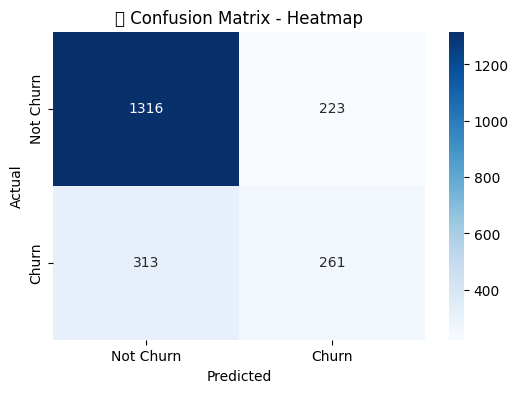


📊 Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.86      0.83      1539
           1       0.54      0.45      0.49       574

    accuracy                           0.75      2113
   macro avg       0.67      0.65      0.66      2113
weighted avg       0.73      0.75      0.74      2113


💾 Model and scaler saved successfully.


In [36]:
# Step 1: Upload the dataset
from google.colab import files
import pandas as pd
import io

# Upload CSV file
uploaded = files.upload()
file_name = next(iter(uploaded))
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

# Add 'Class' column if not present
if 'Class' not in df.columns:
    # Try to use 'Churn' as the target if it exists
    churn_col = next((col for col in df.columns if col.lower().strip() == 'churn'), None)
    if churn_col:
        df['Class'] = df[churn_col].map({'No': 0, 'Yes': 1})
    else:
        raise ValueError("The dataset must contain a 'Class' column or a 'Churn' column to be used as the target.")

# Step 2: Validate dataset
if 'Class' not in df.columns:
    raise ValueError("The dataset must contain a 'Class' column as the target variable.")

# Step 3: Preprocess the dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score
)
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# Drop non-numeric and non-useful columns (e.g., IDs)
df = df.select_dtypes(include=['int64', 'float64', 'bool']).copy()

# Feature selection and scaling
X = df.drop('Class', axis=1)
y = df['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)

print(f"\n✅ Accuracy: {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall: {recall:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('🔍 Confusion Matrix - Heatmap')
plt.show()

# Detailed classification report
print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred, zero_division=0))

# Save model and scaler
joblib.dump(model, 'churn_classifier_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("\n💾 Model and scaler saved successfully.")